In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Sarcasm Detection.tsv',delimiter='\t',quoting=3)

In [3]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
corpus=[]
for i in range(0,1000):
    review =re.sub('[^a-zA-Z]',' ',dataset['Review'][i]) #we are replacing all the punctions with white spaces
    review=review.lower()  #converting the review into lower case
    review=review.split() # converting our statement into list of words
    #ps=PorterStemmer()
    wordnet=WordNetLemmatizer()
    #here 'word' is a variable which will contain all the words from review list one by one
    #review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    all_stopwords=stopwords.words('english') #will collect all the stop words
    all_stopwords.remove('not') #remove not form the stopword
#   review=[ps.stem(word) for word in review if not word in set(all_stopwords)]
    review=[wordnet.lemmatize(word) for word in review if not word in set(all_stopwords)]
    #if and only if the word is not present in the stopword will it be allowed to pass on the object of the stemmer class
    review=' '.join(review) # joining all the words of the review list back together to create the cleaned statement review
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# print(corpus)

##### BAG OF WORD

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
#here while creating the object of the countvectorizer class we need to input one important parameter
#and that parameter is max_features which decided after we get the total number of columns
x=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,-1].values

In [6]:
# from sklearn.svm import SVC
# classifier=SVC(kernel='linear',random_state=23)

In [7]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x = sc.fit_transform(x)


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=325)

### Applying PCA

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=750)# since we do not know how many eigenvectors
# are need we keep the value of n components = None so that we can the
# eigenvalues of all the evectors to figure out the best ones
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
# after all the evalues are obtained select the number of evectors and replace
# the value of n_components by that number


[2.59917395e-02 2.15110881e-02 2.06863642e-02 1.73158010e-02
 1.63072970e-02 1.46712691e-02 1.35944563e-02 1.18567437e-02
 1.01326525e-02 9.94257669e-03 8.87054062e-03 8.24544565e-03
 7.66041880e-03 7.33570144e-03 7.19010857e-03 6.91900769e-03
 6.77661263e-03 6.61730016e-03 6.42235346e-03 6.33371740e-03
 6.28969262e-03 6.14306089e-03 6.12609930e-03 5.95490250e-03
 5.82046521e-03 5.76608079e-03 5.66571237e-03 5.57881335e-03
 5.37902788e-03 5.31114178e-03 5.27163413e-03 5.10908689e-03
 5.04512853e-03 4.99445358e-03 4.91899820e-03 4.89384735e-03
 4.76837203e-03 4.72465146e-03 4.67643607e-03 4.65986636e-03
 4.57687706e-03 4.52424458e-03 4.46419560e-03 4.43830537e-03
 4.36393959e-03 4.26813154e-03 4.24025721e-03 4.16472225e-03
 4.15631998e-03 4.11375981e-03 4.09351139e-03 4.03086393e-03
 3.99075466e-03 3.89734521e-03 3.82821416e-03 3.80119666e-03
 3.77548236e-03 3.73046642e-03 3.68551399e-03 3.66231814e-03
 3.63809514e-03 3.61334440e-03 3.58229132e-03 3.52420831e-03
 3.49170533e-03 3.469687

##### SVM

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=24)
classifier.fit(x_train,y_train)


SVC(kernel='linear', random_state=24)

In [11]:
y_pred = classifier.predict(x_test)
print(y_pred)


[1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0
 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1
 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0
 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1]


0.82
[[74 21]
 [15 90]]


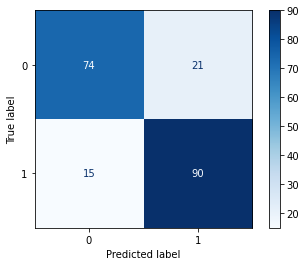

In [12]:
#Creating the confusion matrix and calculating the accuracy score
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix
acc = accuracy_score(y_test,y_pred)
print(acc)
cm = confusion_matrix(y_test,y_pred)
print(cm)
plot_confusion_matrix(classifier,x_test,y_test,cmap=plt.cm.Blues)
plt.show()


In [13]:
# classifier.fit(x_train,y_train)

In [14]:
# from sklearn.metrics import plot_confusion_matrix,accuracy_score
# acc=accuracy_score(y_test,y_pred)
# print(acc)
# plot_confusion_matrix(classifier,x_test,y_test)